## 분류문제
### MINST (Modified National Institute of Standards and Technology)

70000개 이미지와 레이블로 구성

앞 60000개 : 훈련 데이터, 마지막 100000개 : 테스트 데이터

이미지 파일은 28x28 픽셀 그레이 스케일로 되어있다. (즉, 한 픽셀 값이 0(검은색) ~ 255(흰색))

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
# 픽셀이 28 x 28로 구성되어 있어서
mnist = fetch_openml('mnist_784', version=1)

In [4]:
type(mnist)

sklearn.utils.Bunch

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [6]:
X, y = mnist['data'], mnist['target']

In [7]:
type(X)

numpy.ndarray

In [8]:
X.shape

(70000, 784)

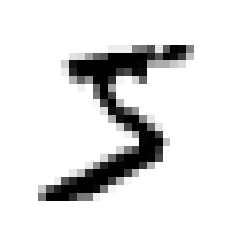

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.axis('off')

plt.show()

In [12]:
y[1]

'0'

In [13]:
# 문자형 레이블을 수치형으로 변경
import numpy as np
y = y.astype(np.uint8)

In [14]:
y[0]

5

In [15]:
y[1]

0

In [17]:
# 훈련 세트와 테스트 세트 나누기
X_train, X_test, y_train, y_test = X[:60000:], X[:60000:], y[:60000], y[60000:]

## 이진 분류기 (Binary Classifier)

    5 - 감지기를 만들기 (5인지 아닌지 분류하는 분류기)

In [18]:
y_train_5 = (y_train == 5)

In [19]:
type(y_train_5)

numpy.ndarray

In [20]:
# 0번 인덱스의 이미지가 5라서 True 출력
y_train_5[0]

True

In [24]:
# 0번 인덱스의 이미지가 0이라서 False 출력
y_train_5[1]

False

In [25]:
# 확룰적 경사 하강법 SGD (Stochastic gradient descent) 분류기 적용

from sklearn.linear_model import SGDClassifier

In [26]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
sgd_clf.predict([some_digit])

array([ True])

In [29]:
some_digit = X[0]

In [30]:
sgd_clf.predict([some_digit])

array([ True])

## 성능 측정

### 교차 검증을 통한 성능 측정


In [33]:
# cross vlaidation을 사용해서 점수를 알려줌
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [35]:
# 성능 비교를 위해 dummy 분류기를 만들어 보자
# dummy 분류기 ?
from sklearn.base import BaseEstimator

class Never5Classfier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [36]:
never_5_clf = Never5Classfier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

### 더 좋은 성능 측정 방법 : 오차 행렬(Confusion Matrix)

In [37]:
from sklearn.model_selection import cross_val_predict

In [38]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# 평가 점수가 아닌 (cross_val_score) 각 테스트 폴드에서 얻은 예측을 리턴

In [40]:
type(y_train_pred)

numpy.ndarray

In [41]:
y_train_pred.shape

(60000,)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
# 3530 -> 5인데 5로 판단된 것 (True Negative)
# 687 -> 5가 아닌데 5로 판단된 것 (False Positive)
# 3530 -> 5인데 5로 판단되지 않은 것 (False Negative)
confusion_matrix(y_train_5, y_train_pred) ## 오차 행렬 생성

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [46]:
# 분류가 완벽한 경우
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

정확도(precision) : 양성 예측의 정확도

 : TP / (NP + TP)

In [49]:
# 정확도 출력
# 그렇지만 FN을 고려하지 않아서 문제 발생
3530 / (687+3530)

0.8370879772350012

In [50]:
from sklearn.metrics import precision_score

In [52]:
# 5라고 감지한 이미지 중에 83.5%가 실제로 5
precision_score(y_train_5, y_train_pred)

0.8370879772350012

재현률(recall) : 분류기가 정확하게 감지한 양성 샘플의 비율


In [54]:
3530 / (1891 + 3530)

0.6511713705958311

In [56]:
from sklearn.metrics import recall_score

In [59]:
# 재현률 계산
# 전체 숫자 '5' 훈련 이미지 중 65% 만 감지 
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [60]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

##정밀도와 재현율의 trade-off

- 예측 결과가 아닌 결정 점수를 반환하도록 함.

In [1]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')

NameError: name 'cross_val_predict' is not defined

In [ ]:
y_scores.shape

In [2]:
y_scores[0]

NameError: name 'y_scores' is not defined

In [ ]:
y_scores[1]

In [3]:
## precision_recall_curve() 모든 임계값에 대해 정밀도와 재현율을 계산하자.
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

NameError: name 'y_train_5' is not defined

In [ ]:
precisions.shape

In [ ]:
recalls.shape

In [ ]:
thresolds.shape

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresolds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresolds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

--> 재현율에 대한 정밀도 곡선을 그린다.

>좋은 정밀도/재현율 trade-off 선택을 위해서!!!

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()